In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


Read one data sample

In [4]:
train_labels = pd.read_csv('../data/train.csv')

1. Check image sizes in the dataset
2. Determine image size for the (initial) training

Split into training and validation datasets


In [9]:
train_labels['labels'].value_counts(normalize=True)[-6:].sum()

0.07272434521253757

In [4]:
train_labels['labels'].apply(lambda x: x if x == 'healthy' else 'sick').value_counts(normalize=True)

sick       0.751825
healthy    0.248175
Name: labels, dtype: float64

In [5]:
labels = train_labels.sort_values(by='image')['labels'].tolist()

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory('train_images_wrapper', labels=labels, validation_split=0.2, subset='training', shuffle=False)
val_ds = tf.keras.utils.image_dataset_from_directory('train_images_wrapper', labels=labels, validation_split=0.2, subset='validation', shuffle=False)

Found 18632 files belonging to 1 classes.
Using 14906 files for training.


2022-03-29 14:19:18.751667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 14:19:18.774982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 14:19:18.775426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 14:19:18.776397: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 18632 files belonging to 1 classes.
Using 3726 files for validation.


In [10]:
train_labels['labels'].nunique()

12

In [7]:
import os

folder_path = 'train_images_wrapper/train_images'
#for img_path in os.listdir(folder_path):
#    img = cv2.imread(folder_path + '/' + img_path, cv2.IMREAD_COLOR)
#    print(img.shape)

complex


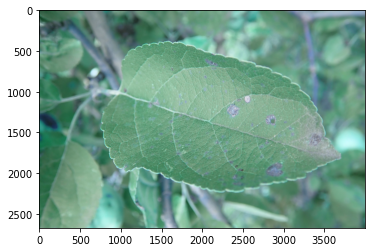

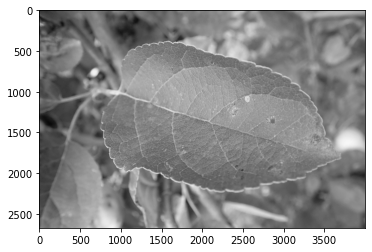

frog_eye_leaf_spot


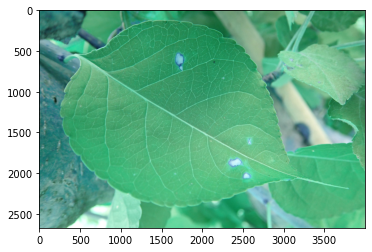

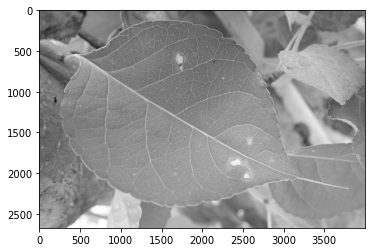

frog_eye_leaf_spot complex


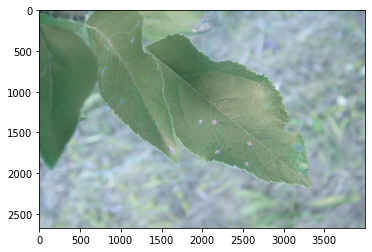

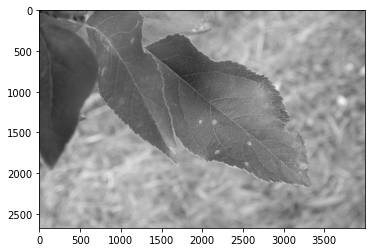

healthy


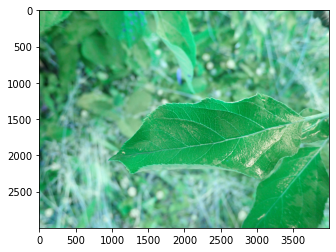

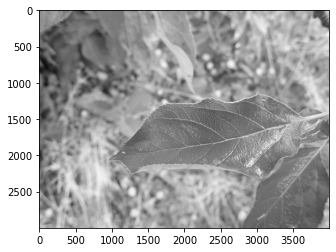

powdery_mildew


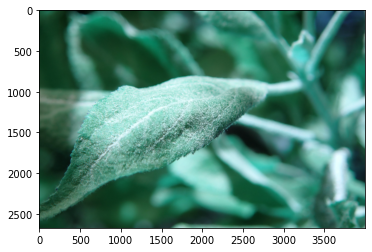

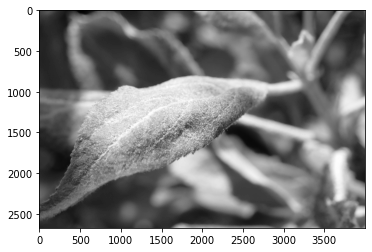

powdery_mildew complex


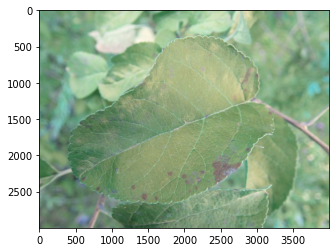

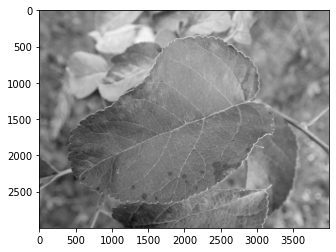

rust


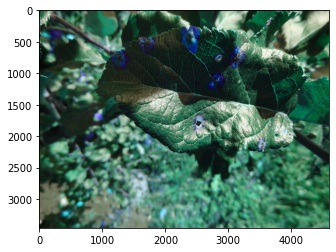

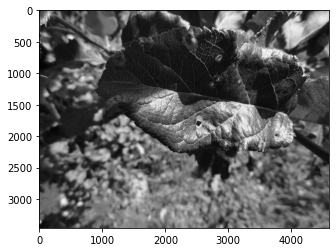

rust complex


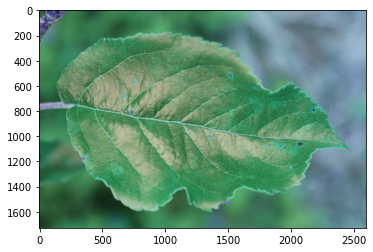

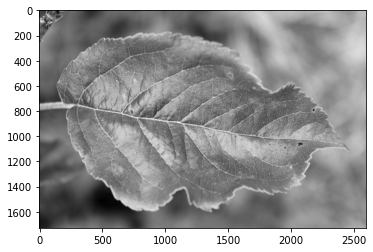

rust frog_eye_leaf_spot


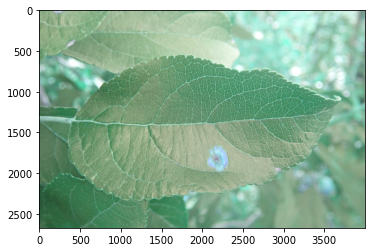

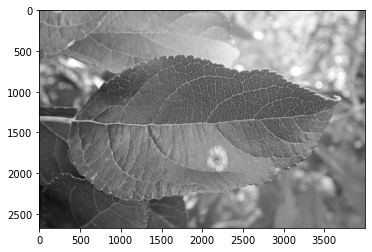

scab


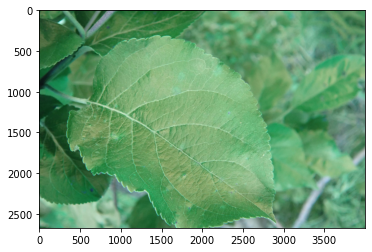

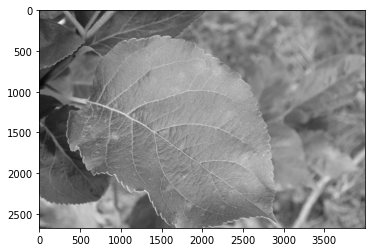

scab frog_eye_leaf_spot


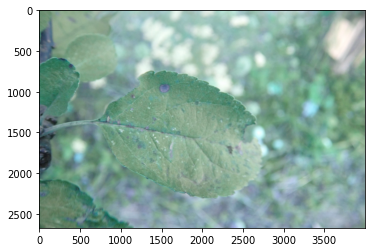

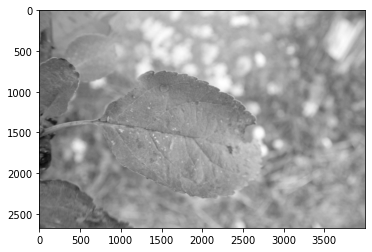

scab frog_eye_leaf_spot complex


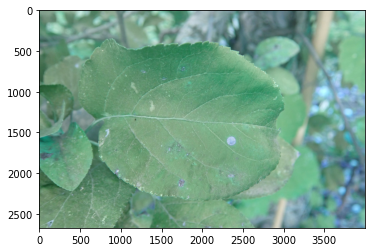

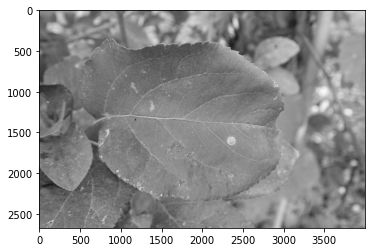

In [55]:
for group, df in train_labels.groupby('labels'):
    print(group)
    img = cv2.imread(folder_path + '/' + df.iloc[1]['image'], cv2.IMREAD_COLOR)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thr = cv2.adaptiveThreshold(img_gray, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    #circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1.2, 100)
    #if circles is not None:
    #    print(circles)

    #img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
    #edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=150)

    plt.imshow(img)
    plt.show()
    plt.imshow(img_gray, cmap='gray')
    plt.show()

In [45]:
circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 15, 100)

In [46]:
circles.shape

(1, 667, 3)

In [47]:
import numpy as np

In [48]:
circles = np.round(circles[0, :]).astype("int")

In [49]:
output = img.copy()
for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
        if r > 60:
            continue
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

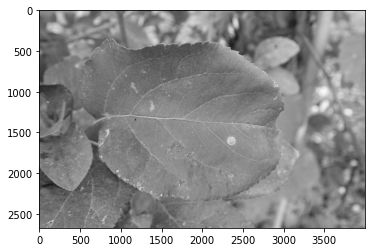

In [54]:
plt.imshow(img_gray, cmap='gray')

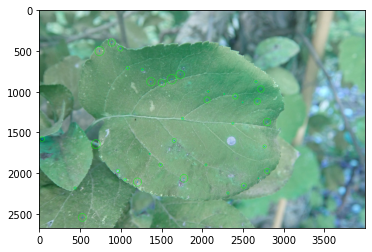

In [50]:
plt.imshow(output)